<a href="https://colab.research.google.com/github/sai-krishna-dalai-333/AI-ML/blob/main/Fashion_designing_using_GANS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Fashion Designing Using Generative Adverserial Networks**

### 1.Importing Libraries 

In [ ]:
import keras     #deep learning api to build models easily
import pandas as pd    #data-preprocessing library
import numpy as np       #to deal with high-dimensional data
import matplotlib.pyplot as plt  #visualization 
from keras.layers import Dense, Dropout, Input, Conv2D, Flatten, BatchNormalization, Reshape #import dense,convolution,input,flatten layers from keras
from keras.models import Model,Sequential  #import seuential model
from keras.datasets import fashion_mnist   #import the fashion_mnist dataset from keras datsets
from tqdm import tqdm  #allows you to output a smart progress bar by wrapping around any iterable
from keras.layers.advanced_activations import LeakyReLU  #import activation functions
#from keras.optimizers import Adam

In [ ]:
import tensorflow as tf

In [ ]:
import glob     #to search for a specific file pattern, or perhaps more usefully, search for files where the filename matches a certain pattern 
import imageio    #easy interface to read and write a wide range of image data, including animated images returns numpy array
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL  #image processing tools that aids in editing, creating and saving images
from tensorflow.keras import layers
import time

from IPython import display

### 2.Download the Dataset Fashion_mnist from the keras datasets

In [ ]:
!pip install -q imageio   #install imageio and tensorflow
!pip install -q git+https://github.com/tensorflow/docs

In [ ]:
(train_images, train_labels), (_, _) = fashion_mnist.load_data()   #download the dataset fshion_mnist from keras datasets  
#assign entire dataset to the train_images and train_labels 

4431872/4422102 [==============================] - 0s 0us/step


FASHION_MNIST DATASET***

This is a dataset of 60,000 28x28 grayscale images of 10 fashion categories, along with a test set of 10,000 images. This dataset can be used as a drop-in replacement for MNIST.

The classes are:

*     Label    	Description
*      0 ---->     T-shirt
*      1  ---->	     Trouser
*      2  ----> 	Pullover
*      3 ----> 	Dress
*      4 ----> 	Coat
*      5 ----> 	Sandal
*      6 ----> 	Shirt
*      7 ----> 	Sneaker
*      8	----> Bag
*      9	----> Ankle boot






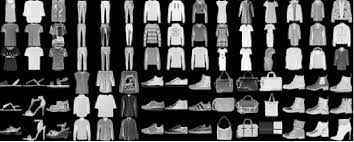

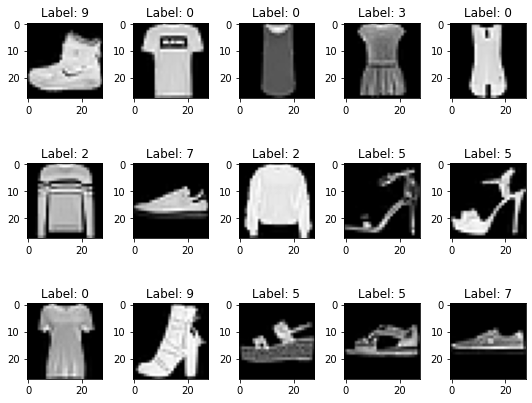

In [ ]:
train_images.shape # verifying the shape of the train_images

(60000, 28, 28, 1)

### 3.Reshape and Normalize the data

In [ ]:
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1).astype('float32')  #train_images is the 3-D array we need to reshape it
train_images = (train_images - 127.5) / 127.5   # Normalize the images to [-1, 1]    
#normalize the data to lie the values between -1 and 1, each pixel value lies between 0 to 255

In [ ]:
BUFFER_SIZE = 60000   #fix the buffer size and batch size
BATCH_SIZE = 256

In [ ]:
# Batch and shuffle the data
train_dataset = tf.data.Dataset.from_tensor_slices(train_images).shuffle(BUFFER_SIZE).batch(BATCH_SIZE)  

## 4.Built a Generator

In [ ]:
#function to build the generator 
def make_generator_model():
    model = tf.keras.Sequential()           #build a sequential model
    model.add(layers.Dense(7*7*256, use_bias=False, input_shape=(100,)))  #Input layer
    model.add(layers.BatchNormalization())  #it is a process to make neural networks faster and more stable through adding extra layers in a deep neural network. 
    model.add(layers.LeakyReLU())            #We can use Batch Normalization in Convolution Neural Networks, Recurrent Neural Networks, and Artificial Neural Networks.

    model.add(layers.Reshape((7, 7, 256)))
    assert model.output_shape == (None, 7, 7, 256) # Note: None is the batch size

    #hidden layer with batch normalization and activation function
    model.add(layers.Conv2DTranspose(128, (5, 5), strides=(1, 1), padding='same', use_bias=False))
    assert model.output_shape == (None, 7, 7, 128)
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    #hidden layer 2 with batch normlization and ctivtion function
    model.add(layers.Conv2DTranspose(64, (5, 5), strides=(2, 2), padding='same', use_bias=False))
    assert model.output_shape == (None, 14, 14, 64)
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())
    
    #output layer with ctivation function
    model.add(layers.Conv2DTranspose(1, (5, 5), strides=(2, 2), padding='same', use_bias=False, activation='tanh'))
    assert model.output_shape == (None, 28, 28, 1)

    return model

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12544)             1254400   
                                                                 
 batch_normalization (BatchN  (None, 12544)            50176     
 ormalization)                                                   
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 12544)             0         
                                                                 
 reshape (Reshape)           (None, 7, 7, 256)         0         
                                                                 
 conv2d_transpose (Conv2DTra  (None, 7, 7, 128)        819200    
 nspose)                                                         
                                                                 
 batch_normalization_1 (Batc  (None, 7, 7, 128)        5

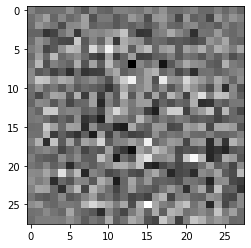

In [ ]:
generator = make_generator_model()
 #generator intially generates the random noise without labelling and give it to discriminator
noise = tf.random.normal([1, 100]) #creation of random noise
generated_image = generator(noise, training=False)

plt.imshow(generated_image[0, :, :, 0], cmap='gray') #imshow is used to show the image of the data
generator.summary()

***Generator Function:***

The role of the generator is to estimate the probability distribution of the real samples in order to provide generated samples resembling real data.

The generator G is fed with random data from a latent space, and its role is to generate data resembling the real samples

### **Generator initially with the random sample**

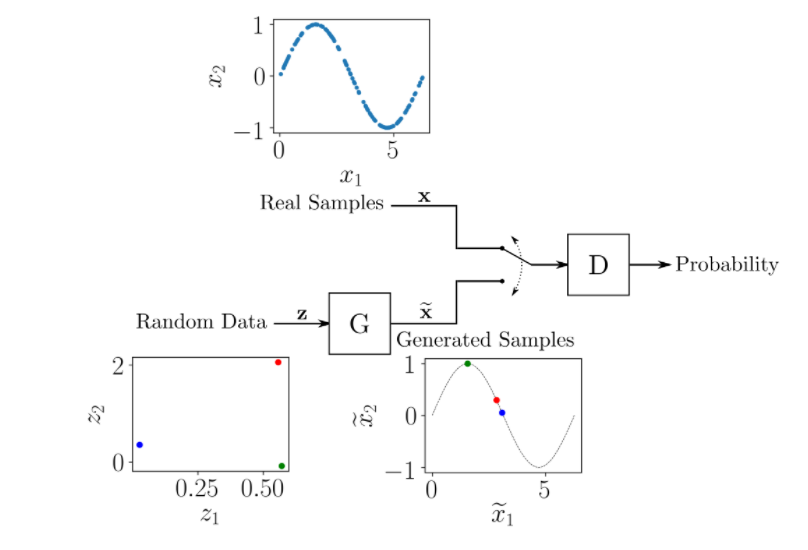

### ***Generator produce the data which resembles the original labaled data*** 

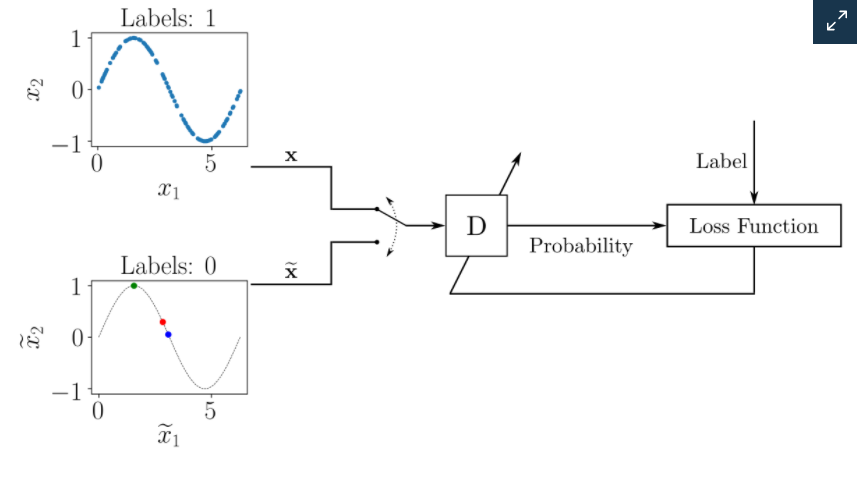

4.Built a Discriminative model

*     supervised lerning
*     function is to detect whether the sample is real or fake (coming from the original dataset or from generator)

In [ ]:
def make_discriminator_model():
    model = tf.keras.Sequential() #sequential model
    #input convolution layer  with activation function
    model.add(layers.Conv2D(64, (5, 5), strides=(2, 2), padding='same',
                                     input_shape=[28, 28, 1]))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

     #hidden layer convolution
    model.add(layers.Conv2D(128, (5, 5), strides=(2, 2), padding='same'))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))
   #flatten the high dimension data to single array
    model.add(layers.Flatten())
    #output layer with a binary classification
    model.add(layers.Dense(1))

    return model

In [ ]:
discriminator = make_discriminator_model()   
decision = discriminator(generated_image)  #for the specific image given to discriminator is checked whether it is fake or real
print (decision)

tf.Tensor([[0.00020697]], shape=(1, 1), dtype=float32)


In [ ]:
# This method returns a helper function to compute cross entropy loss
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)

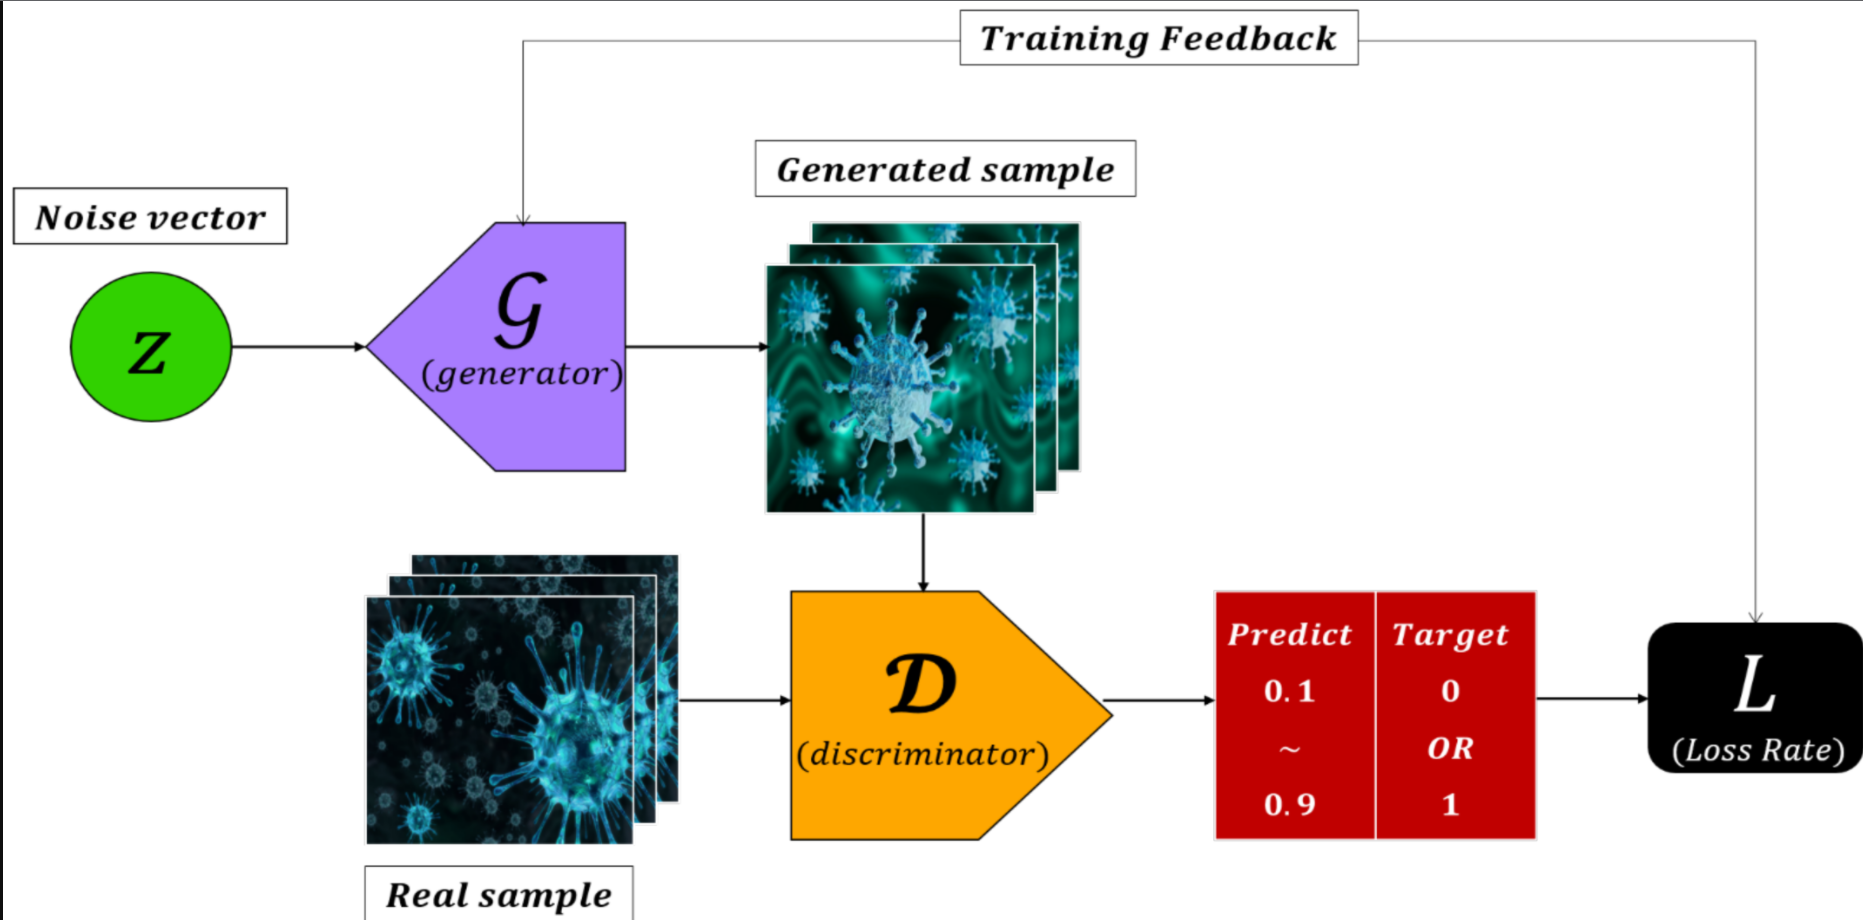

**5. Defining loss functions for Generator and Discriminator**

In [ ]:
def discriminator_loss(real_output, fake_output):
    #returns loss obtained 
    real_loss = cross_entropy(tf.ones_like(real_output), real_output)
    fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
    total_loss = real_loss + fake_loss
    return total_loss

In [ ]:
def generator_loss(fake_output):
    return cross_entropy(tf.ones_like(fake_output), fake_output)

In [ ]:
#Using adam optimizer for both generator and discriminator
generator_optimizer = tf.keras.optimizers.Adam(1e-4)
discriminator_optimizer = tf.keras.optimizers.Adam(1e-4)

In [ ]:
checkpoint_dir = './training_checkpoints'
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt")
checkpoint = tf.train.Checkpoint(generator_optimizer=generator_optimizer,
                                 discriminator_optimizer=discriminator_optimizer,
                                 generator=generator,
                                 discriminator=discriminator)

In [ ]:
EPOCHS = 50
noise_dim = 100
num_examples_to_generate = 16

# We will reuse this seed overtime (so it's easier)
# to visualize progress in the animated GIF)
seed = tf.random.normal([num_examples_to_generate, noise_dim])

In [ ]:
# Notice the use of `tf.function`
# This annotation causes the function to be "compiled".
@tf.function
def train_step(images):
    noise = tf.random.normal([BATCH_SIZE, noise_dim])

    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
      generated_images = generator(noise, training=True)

      real_output = discriminator(images, training=True)
      fake_output = discriminator(generated_images, training=True)

      gen_loss = generator_loss(fake_output)
      disc_loss = discriminator_loss(real_output, fake_output)

    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))

**6.Training steps:**
1. The discriminator train[link texts for one or more epochs.
2. The generator trains for one or more epochs.
3. Repeat steps 1 and 2 to continue to train the generator and discriminator networks.



In [ ]:
def train(dataset, epochs):
  for epoch in range(epochs):
    start = time.time()

    for image_batch in dataset:
      train_step(image_batch)

    # Produce images for the GIF as we go
    display.clear_output(wait=True)
    generate_and_save_images(generator,
                             epoch + 1,
                             seed)

    # Save the model every 15 epochs
    if (epoch + 1) % 15 == 0:
      checkpoint.save(file_prefix = checkpoint_prefix)

    print ('Time for epoch {} is {} sec'.format(epoch + 1, time.time()-start))

  # Generate after the final epoch
  display.clear_output(wait=True)
  generate_and_save_images(generator,
                           epochs,
                           seed)

7. Display generated images while training

In [ ]:
def generate_and_save_images(model, epoch, test_input):
  # Notice `training` is set to False.
  # This is so all layers run in inference mode (batchnorm).
  predictions = model(test_input, training=False)

  fig = plt.figure(figsize=(4,4))

  for i in range(predictions.shape[0]):
      plt.subplot(4, 4, i+1)
      plt.imshow(predictions[i, :, :, 0] * 127.5 + 127.5, cmap='gray')
      plt.axis('off')

  plt.savefig('image_at_epoch_{:04d}.png'.format(epoch))
  plt.show()

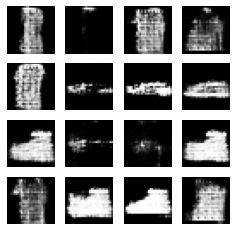

Time for epoch 30 is 33.45961046218872 sec


In [ ]:
train(train_dataset, EPOCHS)

In [ ]:
anim_file = 'dcgan.gif'
with imageio.get_writer(anim_file, mode='I') as writer:
  filenames = glob.glob('image*.png')
  filenames = sorted(filenames)
  for filename in filenames:
    image = imageio.imread(filename)
    writer.append_data(image)
  image = imageio.imread(filename)
  writer.append_data(image)


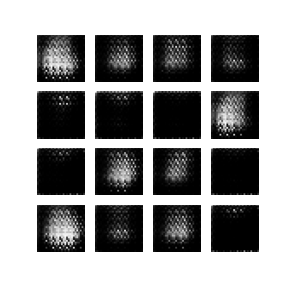

In [ ]:
import tensorflow_docs.vis.embed as embed
embed.embed_file(anim_file)